# ue2, Jack Heseltine
## 2.2

4  sample solutions
[7, 1, 5, 2, 3, 4, 8, 6]
[7, 1, 2, 3, 4, 5, 8, 6]
[7, 1, 2, 3, 5, 4, 8, 6]
[7, 1, 2, 5, 3, 4, 8, 6]


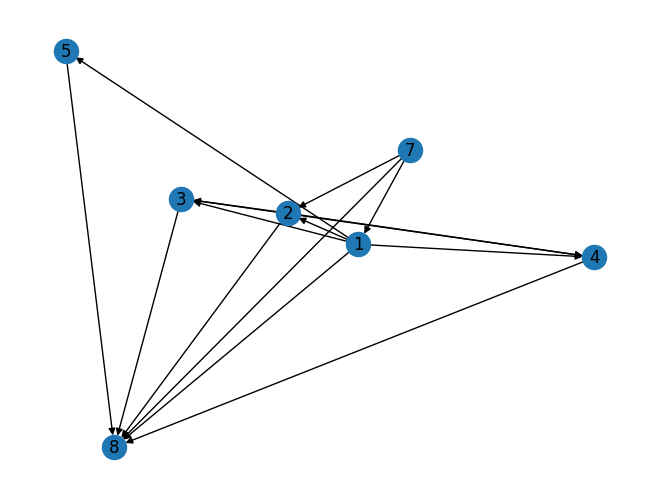

In [1]:
import networkx as nx

DG = nx.DiGraph([(1,2),(1,3),(1,4),(1,5),(1,8),(2,3),(2,4),(2,8),(3,4),(3,8),(4,8),(5,8),(7,1),(7,2),(7,8)])
#DG.add_nodes_from([6]) # 6 to get full graph
nx.draw(DG, with_labels=True)

TS = list(nx.all_topological_sorts(DG))
print(len(TS), " sample solutions")
for t in TS:
    print(t + [6]) # gives the topological sort options of the nodes, add node 6 for completeness

## 2.3

implication graph:


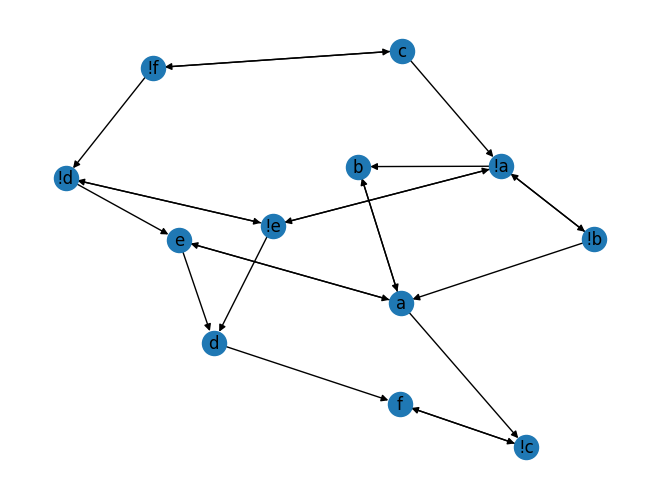

condensation graph:


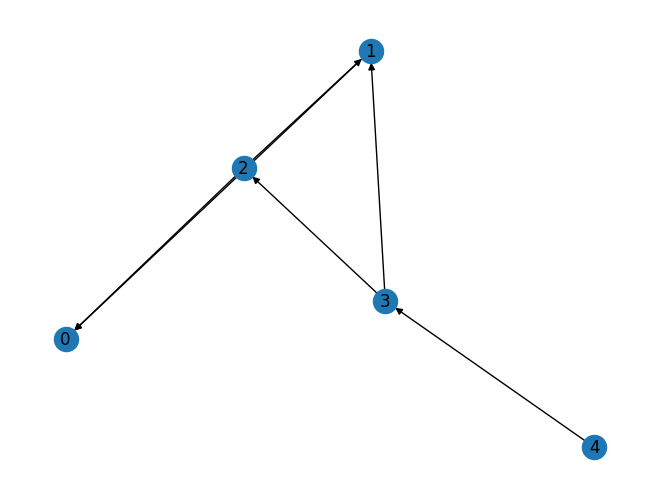

processing assignments ...
0 :  {'!c', 'f'}
1 :  {'d'}
2 :  {'a', 'b', 'e'}
3 :  {'!a', '!d', '!b', '!e'}
4 :  {'c', '!f'}
...
{'!c': True, 'c': False, 'f': True, '!f': False, 'd': True, '!d': False, 'a': True, '!a': False, 'b': True, '!b': False, 'e': True, '!e': False}
- compare to original formula: 
(!a || b) && (a || !b) && (a || b) && (!a || !c) && (!d || e) && (d || !e) && (d || e) && (!d || f) && (!c || !f) && (c || f) && (a || !e) && (!a || e)
The formula evaluates to: True


In [12]:
import matplotlib.pyplot as plt


graph = nx.DiGraph()

edges = [
    ("a", "b"), ("!b", "!a"), # (a -> b) <=> (!b -> !a)
    ("!a", "!b"), ("b", "a"), # (!a -> !b) <=> (b -> a)
    ("!a", "b"), ("!b", "a"), # (!a -> b) <=> (!b -> a)
        # see handwritten notes for manual process up to this line
    ("a", "!c"), ("c", "!a"), # (a -> !c) <=> (c -> !a) 
    ("!d", "e"), ("!e", "!d"), # (!d -> e) <=> (!e -> !d)
    ("!d", "!e"), ("e", "d"), # (!d -> !e) <=> (e -> d)
    ("!d", "e"), ("!e", "d"), # (!d -> e) <=> (!e ->d)
    ("d", "f"), ("!f", "!d"), # (d -> f) <=> (!f -> !d)
    ("c", "!f"), ("f", "!c"), # (c -> !f) <=> (f -> !c)
    ("!c", "f"), ("!f", "c"), # (!c -> f) <=> (!f -> c)
    ("!a", "!e"), ("e", "a"), # (!a -> !e) <=> (e -> a)
    ("a", "e"), ("!e", "!a"), # (a -> e) <=> (!e -> !a)
]
graph.add_edges_from(edges)

# implication graph
print("implication graph:")
nx.draw(graph, with_labels=True)
plt.show()

# get strongly connected components
components = list(nx.strongly_connected_components(graph))

# check if strongly connected components contain varialbe and their negation
for component in components:
    for node in component:
        if node.startswith('!'):
            if node[1:] in component:
                print('Unsolvable because the component contains a variable and its negation.')
                exit(0)


condensation_graph = nx.condensation(graph)

print("condensation graph:")
nx.draw(condensation_graph, with_labels=True)
plt.show()

# Traverse the condensation graph in reverse topological order.
reverse_topological_order = reversed(list(nx.topological_sort(condensation_graph)))
#print("reverse topological order of the condensation graph: " + str(list(reverse_topological_order)))
# understanding python _> why can I not uncomment this line? It looks like it changes the variable content of reverse_topological_order

# initialize
assignment = {}

def complement(var):
    # strip negation "!" or return with "!" if not negated
    # to perform string negation operation
    return var[1:] if var.startswith('!') else '!' + var

print("processing assignments ...")

for component in reverse_topological_order:
    print(component, ": ", condensation_graph.nodes[component]["members"])

    for c in condensation_graph.nodes[component]["members"]: # variable assignment

        if c not in assignment:
            assignment[c] = True
            assignment[complement(c)] = False

print("...")
print(assignment)

print("- compare to original formula: ")
print("(!a || b) && (a || !b) && (a || b) && (!a || !c) && (!d || e) && (d || !e) && (d || e) && (!d || f) && (!c || !f) && (c || f) && (a || !e) && (!a || e)")

def evaluate_cnf(formula, assignments):
    for clause in formula:
        clause_result = False # default evaluation of clause is false
        for literal in clause:
            if literal[0] == '!':
                var = literal[1:] # remove negation
                literal_result = not assignments.get(var, False) # negation case, apply not
                # get takes two arguments: the key to be looked up and a default value to be returned if the key is not found in the dictionary.
            else:
                var = literal # just get the assignment value
                literal_result = assignments.get(var, False) 
            clause_result = clause_result or literal_result # true if at least one literal result is true
        if not clause_result:
            # works for CNF because if one clause is false, the whole formula is false
            return False
        # true of all clauses are true
    return True

# formula encoded
formula = [['!a', 'b'], ['a', '!b'], ['a', 'b'], ['!a', '!c'], ['!d', 'e'], ['d', '!e'], ['d', 'e'], ['!d', 'f'], ['!c', '!f'], ['c', 'f'], ['a', '!e'], ['!a', 'e']]
result = evaluate_cnf(formula, assignment) # assignment from algorithm

print("The formula evaluates to:", result)

## 2.5

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# build graph to traverse
graph = nx.path_graph()

graph.add_node('e', heuristic=55)
graph.add_node('d', heuristic=48)
graph.add_node('f', heuristic=50)
graph.add_node('s', heuristic=45)
graph.add_node('c', heuristic=38)
graph.add_node('b', heuristic=35)
graph.add_node('a', heuristic=40)
graph.add_node('g', heuristic=21)
graph.add_node('h', heuristic=20)
graph.add_node('i', heuristic=26)
graph.add_node('z', heuristic=0)

graph.add_edge('e', 'd', weight=9)
graph.add_edge('e', 's', weight=10)
graph.add_edge('e', 'f', weight=9)
graph.add_edge('f', 'a', weight=10)
graph.add_edge('s', 'f', weight=8)
graph.add_edge('d', 's', weight=7)
graph.add_edge('d', 'c', weight=10)
graph.add_edge('c', 's', weight=7)
graph.add_edge('a', 's', weight=11)
graph.add_edge('a', 'b', weight=7)
graph.add_edge('s', 'b', weight=10)
graph.add_edge('c', 'b', weight=8)
graph.add_edge('c', 'i', weight=12)
graph.add_edge('i', 'b', weight=12)
graph.add_edge('a', 'g', weight=22)
graph.add_edge('b', 'g', weight=19)
graph.add_edge('i', 'h', weight=9)
graph.add_edge('g', 'h', weight=8)
graph.add_edge('i', 'z', weight=32)
graph.add_edge('h', 'z', weight=22)
graph.add_edge('g', 'z', weight=24)

# draw 
pos = nx.spectral_layout(graph)  
fig, ax = plt.subplots(figsize=(20, 6)) # Size of plot (Width: 20, Height: 6)

# draw nodes and edges
nx.draw_networkx_nodes(graph, pos, node_size=1200)
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), arrowstyle='-|>', arrowsize=20)

# add labels
labels = {node: f"{node}\nH={data['heuristic']}" for node, data in graph.nodes(data=True)}
nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()


TypeError: path_graph() missing 1 required positional argument: 'n'

### Dijkstra

In [49]:
import heapq

def dijkstra(graph, start, goal):
    visited = {start: 0}
    path = {}

    nodes = set(graph.nodes)
    total_distance = 0 

    while nodes: 
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node

        if min_node is None:
            break

        print("Current node: ", min_node)
        print("Seen nodes: ", list(visited.keys()))

        total_distance += visited[min_node]  # Add current node's distance to the total distance
        print("Current distance: ", total_distance)
        
        nodes.remove(min_node)
        current_weight = visited[min_node]
        print("Current weight: ", current_weight)

        print("Neighbors: ", list(graph.neighbors(min_node)))

        for edge in graph.edges(min_node, data=True):
            weight = current_weight + edge[2]['weight'] # index 2 holds data
            if edge[1] not in visited or weight < visited[edge[1]]: # index 1 has target node
                visited[edge[1]] = weight
                path[edge[1]] = min_node

    print("Final path: ", [goal] + _get_path(path, start, goal))
    print("Final distance: ", visited[goal])
    return _get_path(path, start, goal) + [goal], visited[goal], visited.keys()

def _get_path(paths, start, goal):
    if goal == start:
        return []
    else:
        return _get_path(paths, start, paths[goal]) + [paths[goal]]

# Dijkstra
path, length, visited_nodes = dijkstra(graph, 's', 'z')
print("length/cost:", length)
print("number of visited nodes:", len(visited_nodes))

Current node:  s
Seen nodes:  ['s']
Current distance:  0
Current weight:  0
Neighbors:  ['b']
Current node:  b
Seen nodes:  ['s', 'b']
Current distance:  10
Current weight:  10
Neighbors:  ['g']
Current node:  g
Seen nodes:  ['s', 'b', 'g']
Current distance:  39
Current weight:  29
Neighbors:  ['h', 'z']
Current node:  h
Seen nodes:  ['s', 'b', 'g', 'h', 'z']
Current distance:  76
Current weight:  37
Neighbors:  ['z']
Current node:  z
Seen nodes:  ['s', 'b', 'g', 'h', 'z']
Current distance:  129
Current weight:  53
Neighbors:  []
Final path:  ['z', 's', 'b', 'g']
Final distance:  53
length/cost: 53
number of visited nodes: 5


## 2.6

Front exploration:  {(0, 0): 0, (0, 1): 1, (1, 0): 1, (0, 2): 2, (1, 1): 2, (2, 0): 2, (0, 3): 3, (1, 2): 3, (2, 1): 3, (3, 0): 3, (0, 4): 4, (1, 3): 4, (2, 2): 4, (3, 1): 4, (4, 0): 4, (0, 5): 5, (1, 4): 5, (2, 3): 5, (3, 2): 5, (4, 1): 5, (5, 0): 5, (0, 6): 6, (1, 5): 6, (2, 4): 6, (3, 3): 6, (4, 2): 6, (5, 1): 6, (6, 0): 6, (0, 7): 7, (1, 6): 7, (2, 5): 7, (3, 4): 7, (4, 3): 7, (5, 2): 7, (6, 1): 7, (7, 0): 7, (0, 8): 8, (1, 7): 8, (2, 6): 8, (3, 5): 8, (4, 4): 8, (5, 3): 8, (6, 2): 8, (7, 1): 8, (8, 0): 8, (0, 9): 9, (1, 8): 9, (2, 7): 9, (3, 6): 9, (4, 5): 9, (5, 4): 9, (6, 3): 9, (7, 2): 9, (8, 1): 9, (9, 0): 9, (0, 10): 10, (1, 9): 10, (2, 8): 10, (3, 7): 10, (4, 6): 10, (5, 5): 10, (6, 4): 10, (7, 3): 10, (8, 2): 10, (9, 1): 10, (10, 0): 10, (0, 11): 11, (1, 10): 11, (2, 9): 11, (3, 8): 11, (4, 7): 11, (5, 6): 11, (6, 5): 11, (7, 4): 11, (8, 3): 11, (9, 2): 11, (10, 1): 11, (11, 0): 11, (0, 12): 12, (1, 11): 12, (2, 10): 12, (3, 9): 12, (4, 8): 12, (5, 7): 12, (6, 6): 12, (7, 5

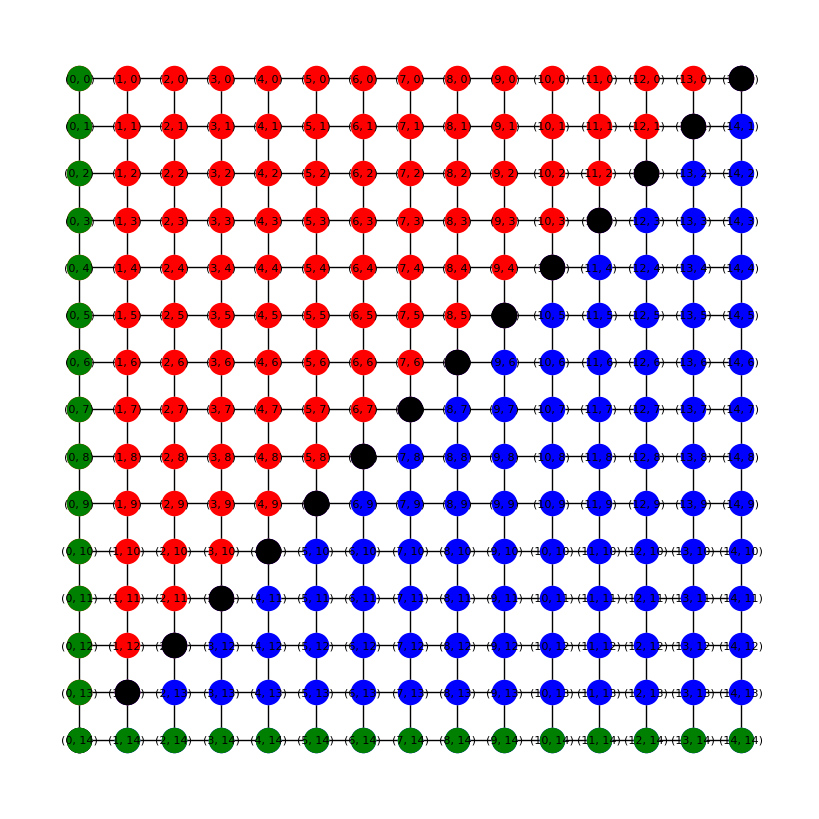

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def create_grid_graph(dim):
    G = nx.grid_2d_graph(dim, dim)
    mapping = {}
    for node in G.nodes():
        mapping[node] = (node[0], dim - 1 - node[1])  # count y coordinate from top left
    G = nx.relabel_nodes(G, mapping)
    return G

def draw_graph(G, path, explored_nodes_front, explored_nodes_back):
    pos = {node: node for node in G.nodes()}  # use node coordinates directly as position
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color='white', font_size=8) 
    nx.draw_networkx_nodes(G, pos, nodelist=explored_nodes_front.keys(), node_color='red') # nodes explored from front
    nx.draw_networkx_nodes(G, pos, nodelist=explored_nodes_back.keys(), node_color='blue') # nodes explored from back
    nx.draw_networkx_nodes(G, pos, nodelist=list(set(explored_nodes_front.keys()) & set(explored_nodes_back.keys())), node_color='black') # nodes explored from both sides
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green')
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()

def bi_directional_dijkstra(G, start, goal):
    if start == goal:
        return [start]

    queue_front = [start]
    queue_back = [goal]

    explored_front = {start: 0}
    explored_back = {goal: 0}

    paths_front = {start: [start]}
    paths_back = {goal: [goal]}

    upper_bound = math.inf
    connection_established = False
    iteration = 0

    while queue_front and queue_back:
        if not connection_established:
            iteration += 1
        node_front = queue_front.pop(0)
        if node_front in explored_back:
            upper_bound = min(upper_bound, explored_front[node_front] + explored_back[node_front])
            # Check if the found path exceeds the upper bound
            if explored_front[node_front] + explored_back[node_front] <= upper_bound:
                connection_established = True
                print("Front exploration: ", explored_front)
                print("Back exploration: ", explored_back)
                break
            else:
                continue

        for node in G.neighbors(node_front):
            if node not in explored_front:
                explored_front[node] = explored_front[node_front] + 1
                queue_front.append(node)
                paths_front[node] = paths_front[node_front] + [node]

        node_back = queue_back.pop(0)
        if node_back in explored_front:
            upper_bound = min(upper_bound, explored_front[node_back] + explored_back[node_back])
            # Check if the found path exceeds the upper bound
            if explored_front[node_back] + explored_back[node_back] <= upper_bound:
                connection_established = True
                print("Front exploration: ", explored_front)
                print("Back exploration: ", explored_back)
                break
            else:
                continue

        for node in G.neighbors(node_back):
            if node not in explored_back:
                explored_back[node] = explored_back[node_back] + 1
                queue_back.append(node)
                paths_back[node] = paths_back[node_back] + [node]

        # Update the upper bound if a shorter path is found in the opposite search direction
        if node_front in explored_back:
            upper_bound = min(upper_bound, explored_front[node_front] + explored_back[node_front])

        if node_back in explored_front:
            upper_bound = min(upper_bound, explored_front[node_back] + explored_back[node_back])

    if connection_established:
        print("Upper Bound: ", upper_bound, " found in iteration ", iteration)
        return paths_front[node_front] + paths_back[node_front][::-1], explored_front, explored_back
    else:
        return [], explored_front, explored_back

G = create_grid_graph(15)
start = (0, 0)
goal = (14, 14)

# run algorithm and draw graph
path, explored_nodes_front, explored_nodes_back = bi_directional_dijkstra(G, start, goal)
draw_graph(G, path, explored_nodes_front, explored_nodes_back)
